In [1]:
include("../speciale_tools.jl")
import JLD
import PyPlot
#figure_folder = "/home/data/simon/result/figures_repport"
figure_folder = "/Users/simon/Documents/DTU fag/Speciale/Figures_repport"

"/Users/simon/Documents/DTU fag/Speciale/Figures_repport"

# Vejle

In [2]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/vejle_new"
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
VV = _load_jld(VV_files,data_folder);
VH = _load_jld(VH_files,data_folder);
VV = [elem[:,end:-1:1] for elem in VV];
VH = [elem[:,end:-1:1] for elem in VH];


In [3]:
name_list = [split(elem,".")[1] for elem in VV_files]
date_string = [split(elem,"_")[4] for elem in name_list]
date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
date_string = [ "$(Dates.Day(elem).value)/$(Dates.Month(elem).value)" for elem in date]
index = [ Dates.Day(elem-date[1]).value for elem in date];

,,,

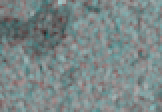
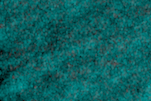
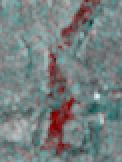
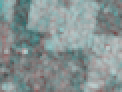

In [10]:
img = pretty_img([VV[1],VV[4]],min_vv,max_vv)
subset1 = [625:680,520:600]
subset2 = [400:500,1350:1500]
subset3 = [710:790,1100:1160]
subset4 = [95:140,1400:1460]
[img[subset1...],img[subset2...],img[subset3...],img[subset4...]]

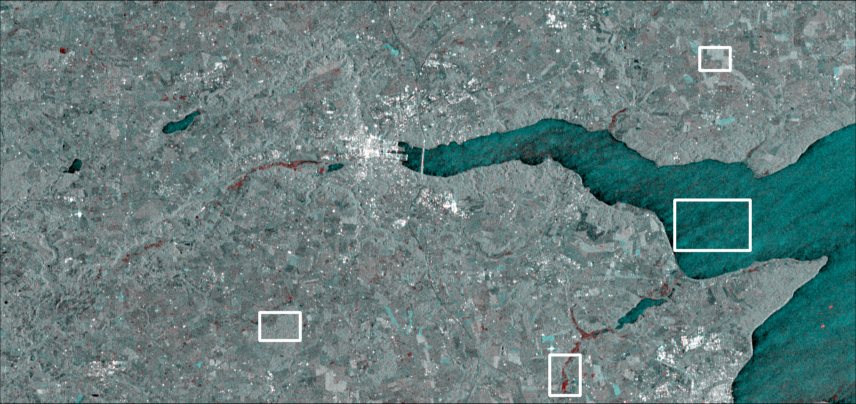

In [11]:
subset_edges = zeros(size(img));
subset_edges[subset1...] .= 1
subset_edges[subset2...] .= 1
subset_edges[subset3...] .= 1
subset_edges[subset4...] .= 1
subset_edges = get_edges(subset_edges);
add_mask(img,subset_edges,(1,1,1))

In [12]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VV];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VV];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VV];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VV];

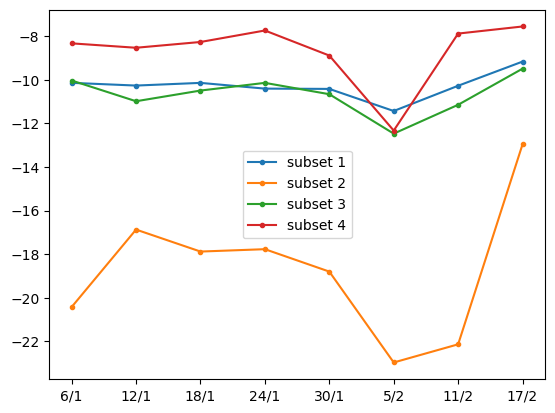

In [13]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);

In [14]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VH];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VH];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VH];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VH];

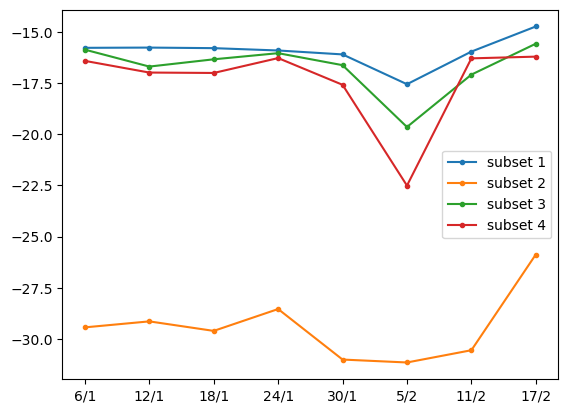

In [15]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);

# RIBE

In [16]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/ribe_new"
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
VV = _load_jld(VV_files,data_folder);
VH = _load_jld(VH_files,data_folder);
VV = [elem[end:-1:1,:] for elem in VV];
VH = [elem[end:-1:1,:] for elem in VH];


In [17]:
name_list = [split(elem,".")[1] for elem in VV_files]
date_string = [split(elem,"_")[4] for elem in name_list]
date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
date_string = [ "$(Dates.Day(elem).value)/$(Dates.Month(elem).value)" for elem in date]
index = [ Dates.Day(elem-date[1]).value for elem in date];

,,,

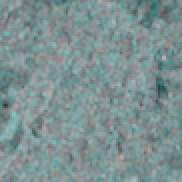
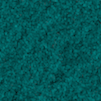
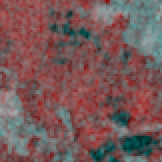
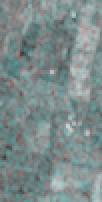

In [18]:
img = pretty_img([VV[1],VV[4]],min_vv,max_vv)
subset1 = [10:100,1080:1170]
subset2 = [400:500,10:110]
subset3 = [480:560,250:330]
subset4 = [1000:1100,450:500]
[img[subset1...],img[subset2...],img[subset3...],img[subset4...]]

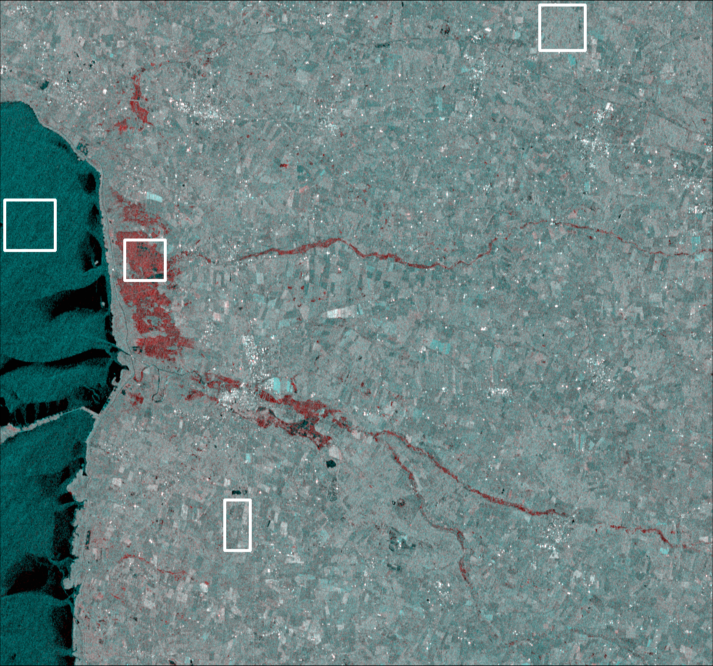

In [19]:
subset_edges = zeros(size(img));
subset_edges[subset1...] .= 1
subset_edges[subset2...] .= 1
subset_edges[subset3...] .= 1
subset_edges[subset4...] .= 1
subset_edges = get_edges(subset_edges);
add_mask(img,subset_edges,(1,1,1))

In [20]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VV];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VV];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VV];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VV];

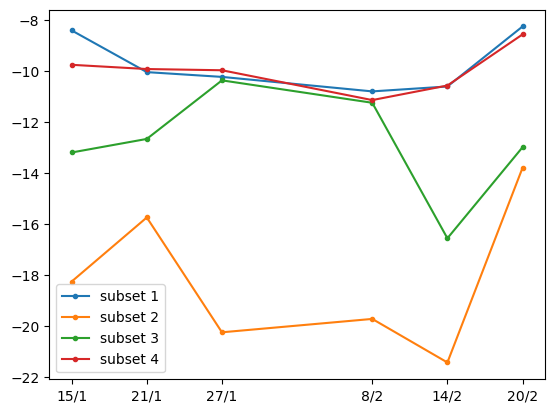

In [21]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);

In [22]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VH];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VH];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VH];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VH];

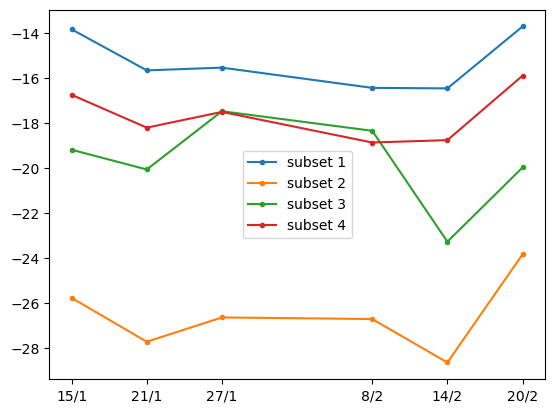

In [23]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);

# Houston

In [24]:
data_folder = "/Users/simon/Documents/DTU fag/Speciale/houston_new"
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
VV = _load_jld(VV_files,data_folder);
VH = _load_jld(VH_files,data_folder);
VV = [elem[:,end:-1:1] for elem in VV];
VH = [elem[:,end:-1:1] for elem in VH];


In [25]:
name_list = [split(elem,".")[1] for elem in VV_files]
date_string = [split(elem,"_")[4] for elem in name_list]
date = [Dates.Date(parse.(Int, [elem[1:4], elem[5:6], elem[7:8]])...) for elem in date_string]
date_string = [ "$(Dates.Day(elem).value)/$(Dates.Month(elem).value)" for elem in date]
index = [ Dates.Day(elem-date[1]).value for elem in date];

,,,

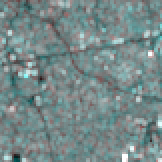
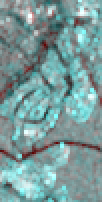
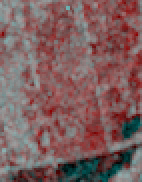
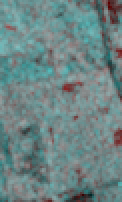

In [26]:
img = pretty_img([VV[1],VV[4]],min_vv,max_vv)
subset1 = [120:200,220:300]
subset2 = [700:800,250:300]
subset3 = [600:690,500:570]
subset4 = [100:200,40:100]
[img[subset1...],img[subset2...],img[subset3...],img[subset4...]]

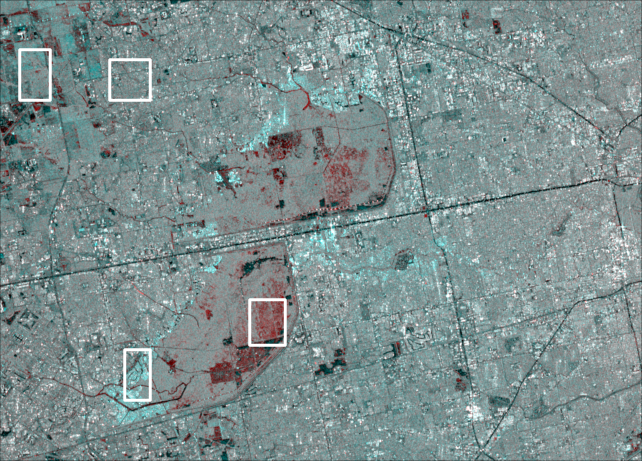

In [27]:
subset_edges = zeros(size(img));
subset_edges[subset1...] .= 1
subset_edges[subset2...] .= 1
subset_edges[subset3...] .= 1
subset_edges[subset4...] .= 1
subset_edges = get_edges(subset_edges);
add_mask(img,subset_edges,(1,1,1))

In [28]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VV];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VV];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VV];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VV];

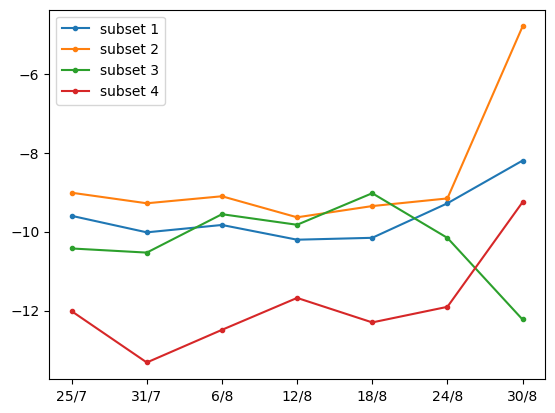

In [29]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);

In [30]:
mean1 = [10 .* log10.(Statistics.mean(reshape(elem[subset1...],:))) for elem in VH];
mean2 = [10 .* log10.(Statistics.mean(reshape(elem[subset2...],:))) for elem in VH];
mean3 = [10 .* log10.(Statistics.mean(reshape(elem[subset3...],:))) for elem in VH];
mean4 = [10 .* log10.(Statistics.mean(reshape(elem[subset4...],:))) for elem in VH];

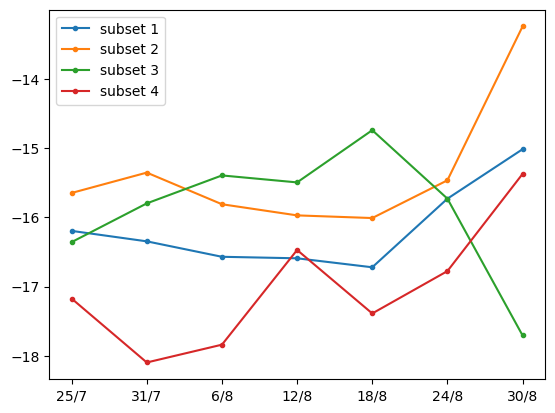

In [31]:
PyPlot.figure()
PyPlot.plot(index,mean1,marker=".")
PyPlot.plot(index,mean2,marker=".")
PyPlot.plot(index,mean3,marker=".")
PyPlot.plot(index,mean4,marker=".")
PyPlot.legend(["subset 1","subset 2","subset 3","subset 4"])
PyPlot.xticks(index,date_string);